# Información de general del Dataset

## Importación de las librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl


## Importación de datos

In [4]:
# Cargamos los datos
df = pd.read_csv('./BTCUSDT1d-18.8.17-31-7-22.csv', index_col=0, parse_dates=True)
df=df.drop(columns=['ignore'])
df=df.drop(columns=['open_time'])
df=df.drop(columns=['close_time'])

In [5]:
df


,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 23:59:59.999,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233,972.868710,4.129123e+06
2017-08-19 23:59:59.999,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153,274.336042,1.118002e+06
2017-08-20 23:59:59.999,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321,376.795947,1.557401e+06
2017-08-21 23:59:59.999,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972,557.356107,2.255663e+06
2017-08-22 23:59:59.999,4016.00,4104.82,3400.00,4040.00,966.684858,3.752506e+06,6494,423.995181,1.637188e+06
...,...,...,...,...,...,...,...,...,...
2022-07-27 23:59:59.999,21254.67,23112.63,21042.53,22952.45,210971.197960,4.614910e+09,5475738,106519.127430,2.330765e+09
2022-07-28 23:59:59.999,22954.31,24199.72,22582.13,23842.93,236029.074100,5.511389e+09,6500034,118170.709450,2.759524e+09
2022-07-29 23:59:59.999,23845.25,24442.66,23414.03,23773.75,198298.506230,4.733781e+09,6221401,100165.608500,2.391311e+09


### Definición del la frequencia

In [6]:
df=df.asfreq('D')
df=df.fillna(method='ffill')
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
qav                0
num_trades         0
taker_base_vol     0
taker_quote_vol    0
dtype: int64

## Análisis estadístico de los datos


### Revisar los datos: head()

Puede revisar las primeras 20 filas de sus datos utilizando la función `head()` en el DataFrame de Pandas. Puede ver que la primera columna enumera el número de fila, lo cual es útil para hacer referencia a una observación específica.

In [7]:
df.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 23:59:59.999,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233.0,972.868710,4.129123e+06
2017-08-19 23:59:59.999,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153.0,274.336042,1.118002e+06
2017-08-20 23:59:59.999,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321.0,376.795947,1.557401e+06
2017-08-21 23:59:59.999,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972.0,557.356107,2.255663e+06
2017-08-22 23:59:59.999,4016.00,4104.82,3400.00,4040.00,966.684858,3.752506e+06,6494.0,423.995181,1.637188e+06


### Dimensiones de los datos: shape

Puede revisar la forma y el tamaño de su conjunto de datos imprimiendo la propiedad shape en el DataFrame de Pandas. Los resultados se enumeran en filas y luego en columnas.

In [8]:
df.shape

(1809, 9)

### Tipos de atributos: dtypes

Puede enumerar los tipos de datos utilizados por el DataFrame para caracterizar cada atributo utilizando la propiedad `dtypes`.

In [9]:
df.dtypes

open               float64
high               float64
low                float64
close              float64
volume             float64
qav                float64
num_trades         float64
taker_base_vol     float64
taker_quote_vol    float64
dtype: object

### Resumen estadístico: describe()

Puedes ver que obtienes muchos datos. Notará algunas llamadas como `pandas.set_option()` utilizada para cambiar la precisión de los números y el ancho preferido de la salida. Esto es para que sea más legible para este ejemplo. Al describir sus datos de esta manera, vale la pena tomarse un tiempo y revisar las observaciones de los resultados.

In [10]:
# Statistical Summary
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
df.describe()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
count,1809.000,1809.000,1809.000,1809.000,1809.000,1.809e+03,1.809e+03,1809.000,1.809e+03
mean,19439.651,20001.895,18793.337,19450.104,53088.037,1.179e+09,8.590e+05,26403.625,5.824e+08
std,17416.618,17896.247,16857.671,17413.364,40084.149,1.432e+09,8.775e+05,19565.402,7.019e+08
min,3188.010,3276.500,2817.000,3189.020,228.108,9.779e+05,2.153e+03,56.190,2.414e+05
25%,7079.000,7298.000,6861.000,7090.140,29349.691,2.355e+08,2.378e+05,14990.422,1.215e+08
50%,9904.460,10250.000,9615.770,9910.000,44283.147,4.922e+08,5.532e+05,22244.919,2.457e+08
75%,33949.530,35059.090,32380.000,33949.530,65927.871,1.807e+09,1.236e+06,32787.049,8.841e+08
max,67525.820,69000.000,66222.400,67525.830,403081.573,1.348e+10,6.564e+06,201798.101,6.410e+09


### Correlaciones: corr()

Puede usar la función corr() para calcular una matriz de correlación. La matriz enumera todos los atributos en la parte superior y lateral, para dar correlación entre todos los pares de atributos (dos veces, porque la matriz es simétrica). Puede ver que la línea diagonal a través de la matriz desde las esquinas superior izquierda a inferior derecha de la matriz muestra una correlación perfecta de cada atributo consigo mismo.

In [11]:
# Pairwise Pearson correlations
df.corr()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
open,1.000,0.999,0.999,0.998,0.217,0.764,0.647,0.207,0.766
high,0.999,1.000,0.998,0.999,0.225,0.772,0.654,0.217,0.774
low,0.999,0.998,1.000,0.999,0.199,0.747,0.634,0.191,0.749
close,0.998,0.999,0.999,1.000,0.213,0.760,0.645,0.205,0.763
volume,0.217,0.225,0.199,0.213,1.000,0.683,0.775,0.998,0.681
qav,0.764,0.772,0.747,0.760,0.683,1.000,0.919,0.676,0.999
num_trades,0.647,0.654,0.634,0.645,0.775,0.919,1.000,0.771,0.921
taker_base_vol,0.207,0.217,0.191,0.205,0.998,0.676,0.771,1.000,0.677
taker_quote_vol,0.766,0.774,0.749,0.763,0.681,0.999,0.921,0.677,1.000


### Matriz de correlación

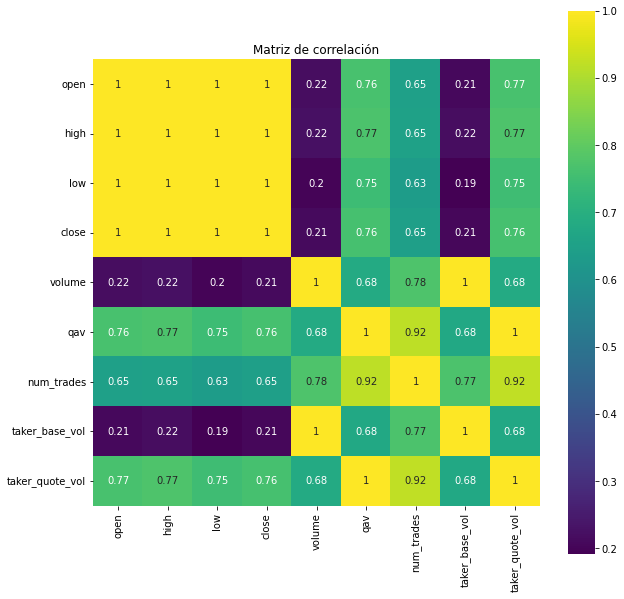

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
plt.figure (figsize=(10,10))
ax= sns.heatmap(correlation, vmax=1, square= True, annot= True, cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

### Asimetría: skew()

Puede calcular el sesgo de cada atributo utilizando la función skew(). El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [13]:
df.skew()

open               1.073
high               1.062
low                1.085
close              1.072
volume             2.488
qav                2.045
num_trades         2.177
taker_base_vol     2.486
taker_quote_vol    2.006
dtype: float64

## Análisis de la distribución

### The QQ Plot

In [14]:
import scipy.stats

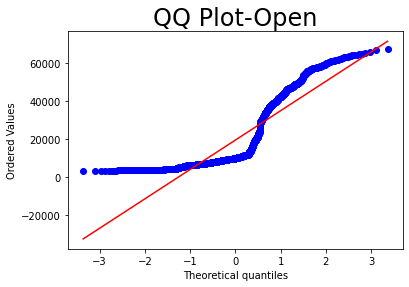

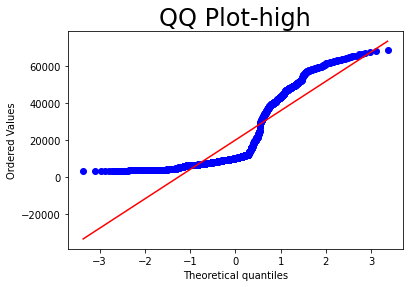

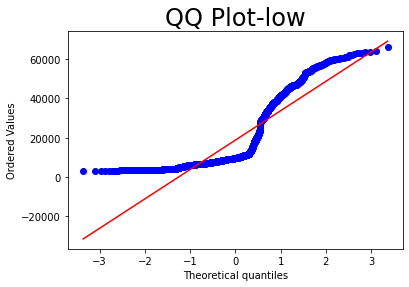

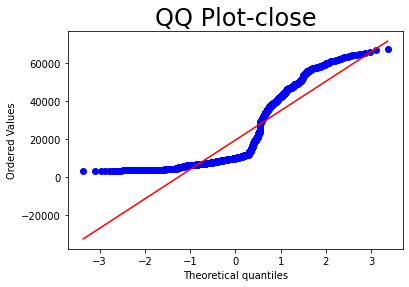

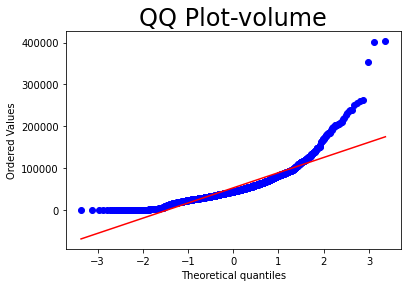

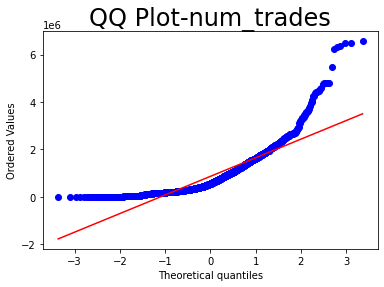

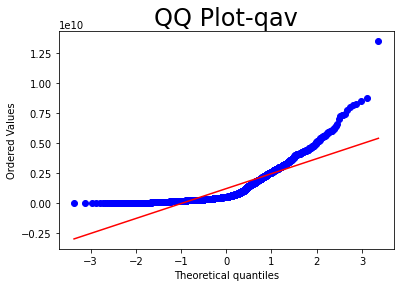

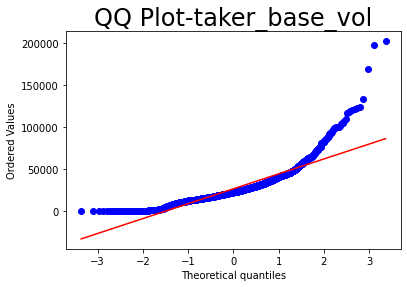

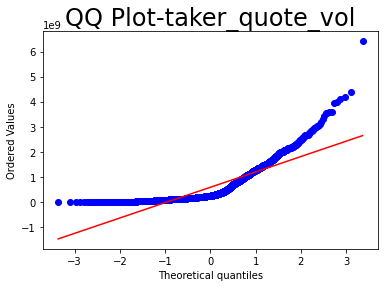

In [15]:
scipy.stats.probplot(df.open, plot =  plt)
plt.title("QQ Plot-Open", size = 24)
plt.show()

scipy.stats.probplot(df.high, plot =  plt)
plt.title("QQ Plot-high", size = 24)
plt.show()

scipy.stats.probplot(df.low, plot =  plt)
plt.title("QQ Plot-low", size = 24)
plt.show()

scipy.stats.probplot(df.close, plot =  plt)
plt.title("QQ Plot-close", size = 24)
plt.show()

scipy.stats.probplot(df.volume, plot =  plt)
plt.title("QQ Plot-volume", size = 24)
plt.show()

scipy.stats.probplot(df.num_trades, plot =  plt)
plt.title("QQ Plot-num_trades", size = 24)
plt.show()

scipy.stats.probplot(df.qav, plot =  plt)
plt.title("QQ Plot-qav", size = 24)
plt.show()

scipy.stats.probplot(df.taker_base_vol, plot =  plt)
plt.title("QQ Plot-taker_base_vol", size = 24)
plt.show()

scipy.stats.probplot(df.taker_quote_vol, plot =  plt)
plt.title("QQ Plot-taker_quote_vol", size = 24)
plt.show()


## Matriz de dispersión

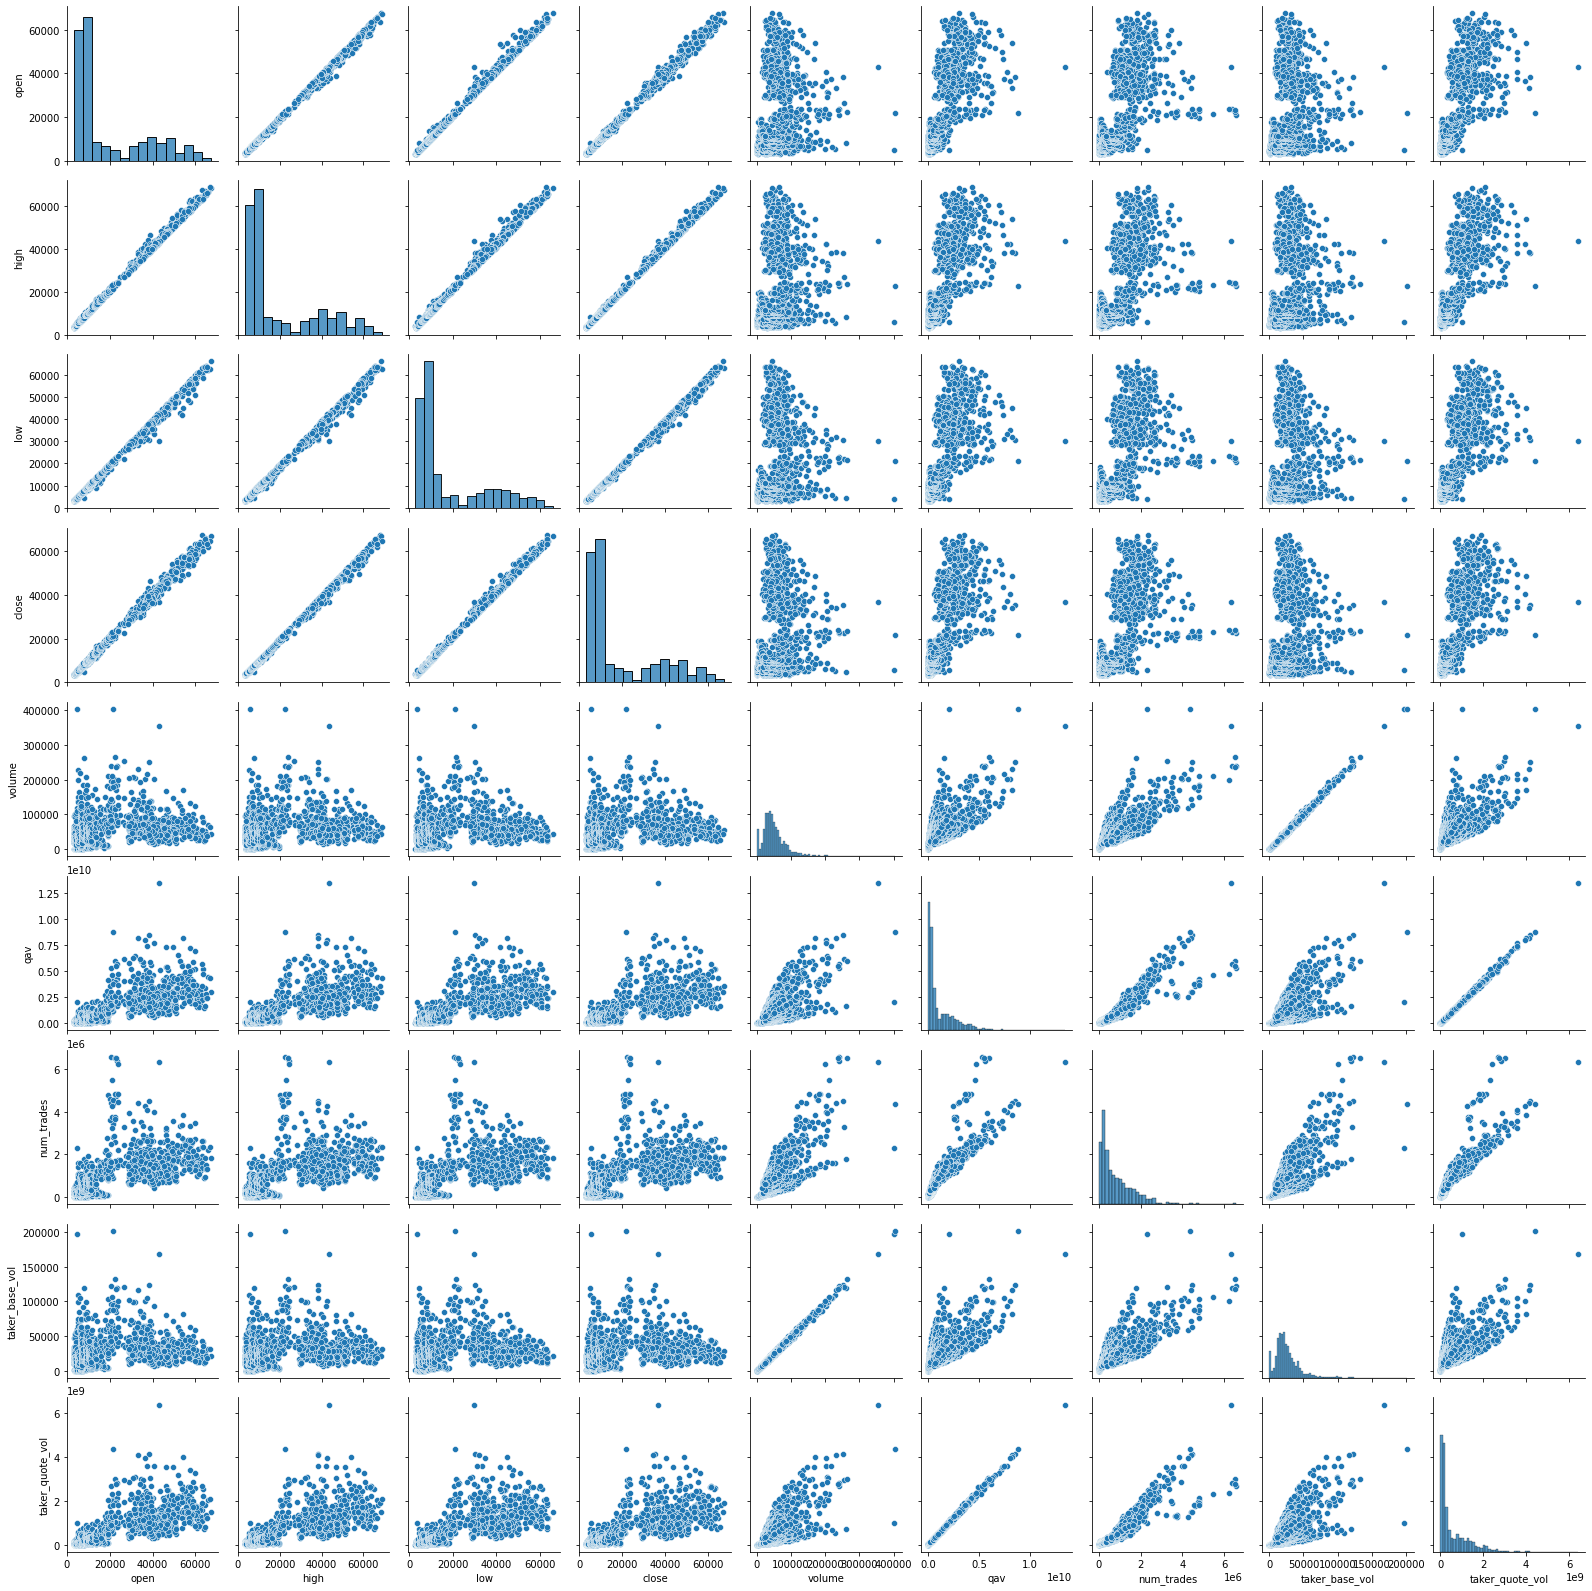

In [16]:
%matplotlib inline
# Correlatioin matrix Seaborn
sns.pairplot(df)

# Representación gráfica del análisis histórico de datos del BTC-USDT entre el 18-08-2017 y el 31-07-2022


---

## Visualización de los datos

## Visualización de los datos

Visualización de los precios Open, Hight, Low, y Close

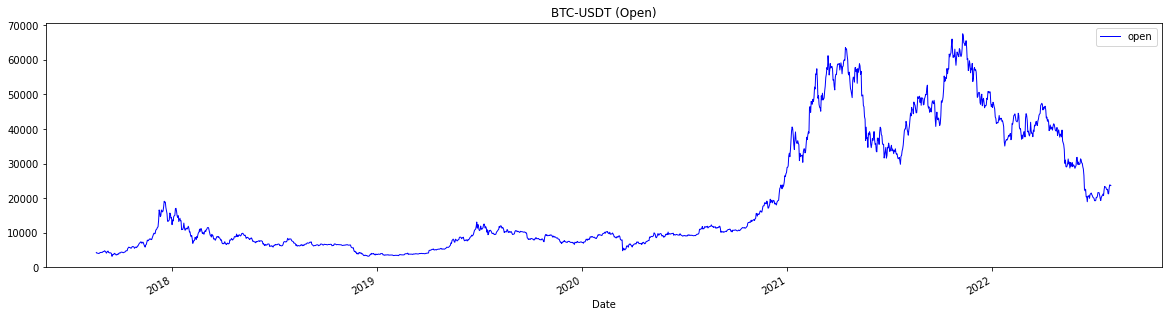

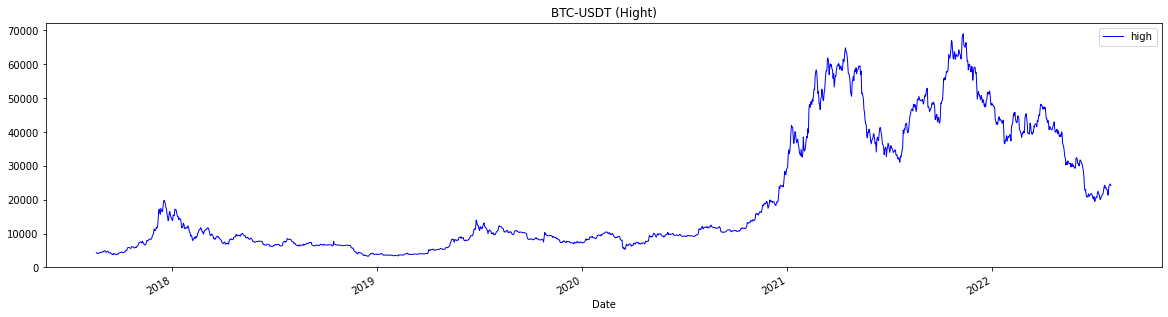

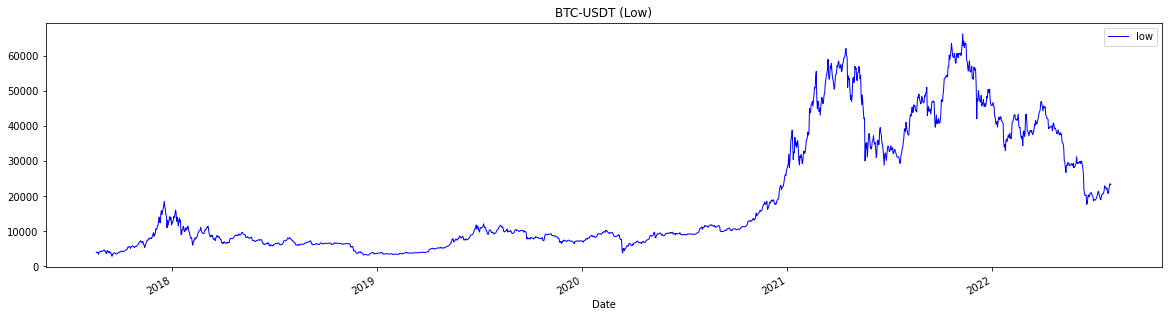

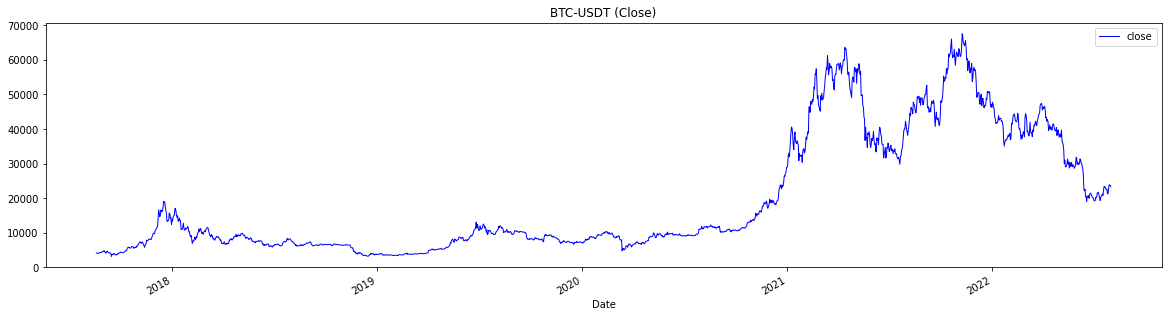

In [17]:
df.plot.line(title='BTC-USDT (Open)',y='open',figsize=(20,5),lw=1, color="blue")
df.plot.line(title='BTC-USDT (Hight)',y='high',figsize=(20,5),lw=1, color="blue")
df.plot.line(title='BTC-USDT (Low)',y='low',figsize=(20,5),lw=1, color="blue")
df.plot.line(title='BTC-USDT (Close)',y='close',figsize=(20,5),lw=1, color="blue")

Visualización del qav

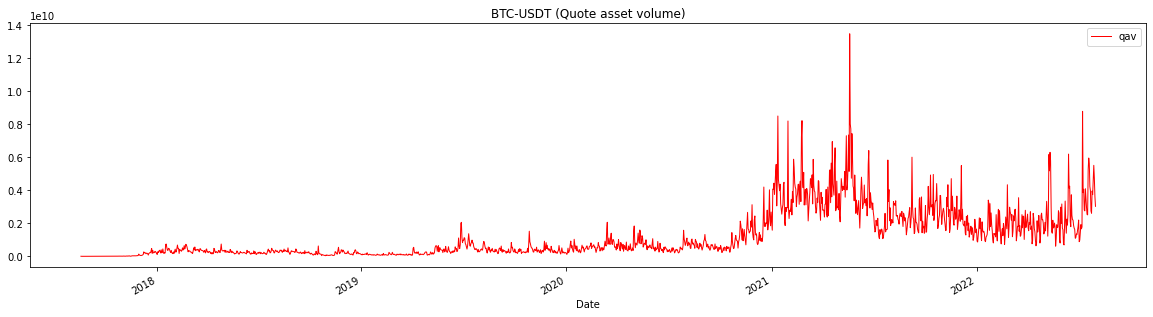

In [18]:
df.plot.line(title='BTC-USDT (Quote asset volume)',y='qav',figsize=(20,5),lw=1, color="red")

Visualización del número de transacciones (num_trades)


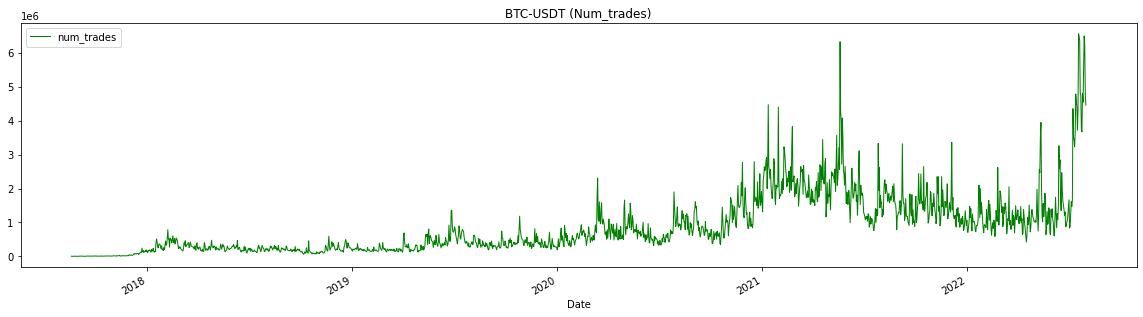

In [19]:
df.plot.line(title='BTC-USDT (Num_trades)',y='num_trades',figsize=(20,5),lw=1, color="green")

Visualización del número de transacciones (taker_base_vol)

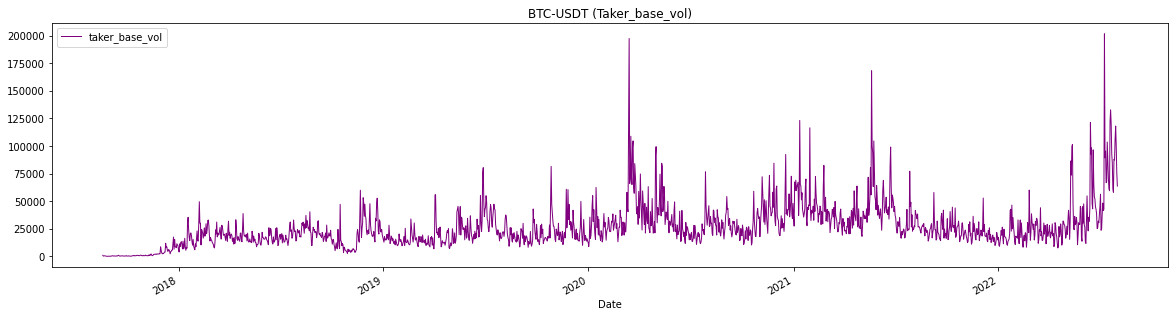

In [20]:
df.plot.line(title='BTC-USDT (Taker_base_vol)',y='taker_base_vol',figsize=(20,5),lw=1, color="purple")

Visualización del número de transacciones (taker_quote_vol)

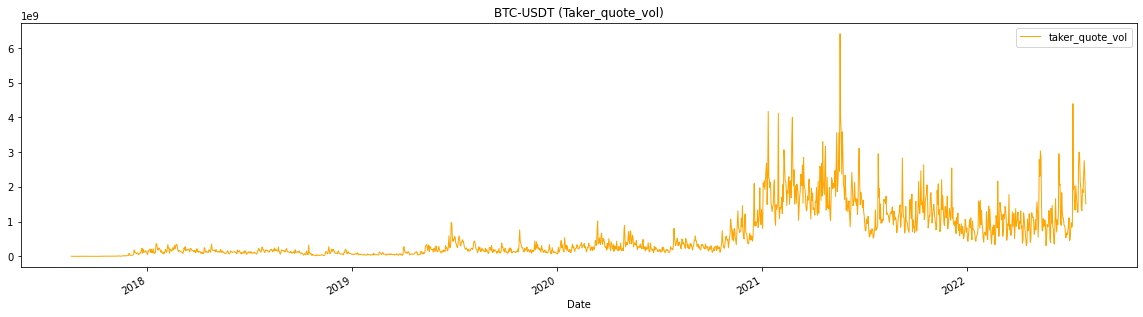

In [21]:
df.plot.line(title='BTC-USDT (Taker_quote_vol)',y='taker_quote_vol',figsize=(20,5),lw=1, color="orange")

# Análisis de la estacionaridad test Dickey-Fuller

## Importar librerias

In [22]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt 


Dickey-Fuller de Open


In [23]:
sts.adfuller(df.open)

(-1.4516971001252854,
 0.5572565869040297,
 24,
 1784,
 {'1%': -3.4340208151070124,
  '5%': -2.8631614607057587,
  '10%': -2.5676332144347365},
 29786.549396162813)


Dickey-Fuller de High


In [24]:
sts.adfuller(df.high)

(-1.4070197242687787,
 0.5789061859628964,
 22,
 1786,
 {'1%': -3.43401669852096,
  '5%': -2.863159643456451,
  '10%': -2.5676322468019896},
 29292.282647235075)

Dickey-Fuller de Low


In [25]:
sts.adfuller(df.low)

(-1.4381501766603304,
 0.5638560403874958,
 18,
 1790,
 {'1%': -3.4340084929858548,
  '5%': -2.8631560211506244,
  '10%': -2.567630318030024},
 29979.262499626846)

Dickey-Fuller de Close


In [26]:
sts.adfuller(df.close)

(-1.4524385668993018,
 0.5568945565552774,
 24,
 1784,
 {'1%': -3.4340208151070124,
  '5%': -2.8631614607057587,
  '10%': -2.5676332144347365},
 29785.09362872503)

Dickey-Fuller de Volumen


In [27]:
sts.adfuller(df.volume)

(-2.755679144641525,
 0.06488887471177068,
 24,
 1784,
 {'1%': -3.4340208151070124,
  '5%': -2.8631614607057587,
  '10%': -2.5676332144347365},
 41127.890817653424)

Dickey-Fuller de QAV


In [28]:
sts.adfuller(df.qav)

(-1.472923790257366,
 0.5468605170856671,
 25,
 1783,
 {'1%': -3.434022876868246,
  '5%': -2.8631623708604996,
  '10%': -2.5676336990659903},
 77321.76173782538)

Dickey-Fuller de Num_trades


In [29]:
sts.adfuller(df.num_trades)

(-0.09789221096384536,
 0.9496480731671925,
 23,
 1785,
 {'1%': -3.434018755659214,
  '5%': -2.8631605515716476,
  '10%': -2.5676327303470408},
 50344.62203792158)

Dickey-Fuller de Taker_base_vol


In [30]:
sts.adfuller(df.taker_base_vol)

(-3.078643717748011,
 0.02817455116490384,
 21,
 1787,
 {'1%': -3.4340146436883665,
  '5%': -2.8631587363584567,
  '10%': -2.5676317637986714},
 38587.318283111126)

Dickey-Fuller de Taker_quote_vol


In [31]:
sts.adfuller(df.taker_quote_vol)

(-1.4234326626686562,
 0.5709920885229326,
 25,
 1783,
 {'1%': -3.434022876868246,
  '5%': -2.8631623708604996,
  '10%': -2.5676336990659903},
 74768.832832276)

# Análisis de la estacionalidad

## Importar librerias

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

Evaluación de la estacionalidad del Open de forma aditiva y de forma multiplicativa

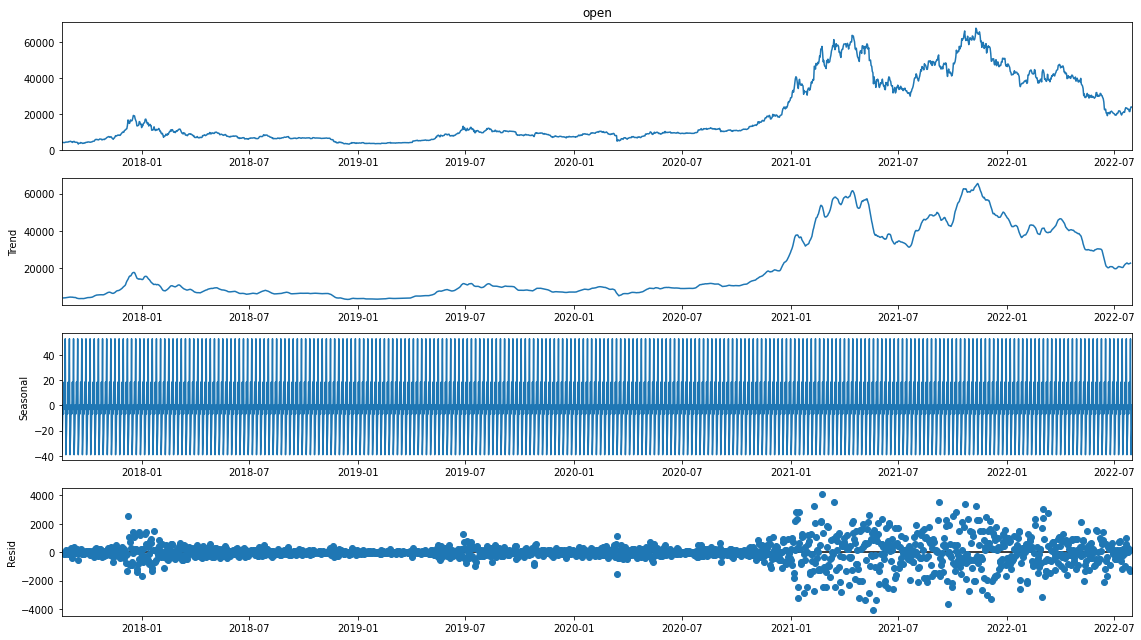

In [33]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['open'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

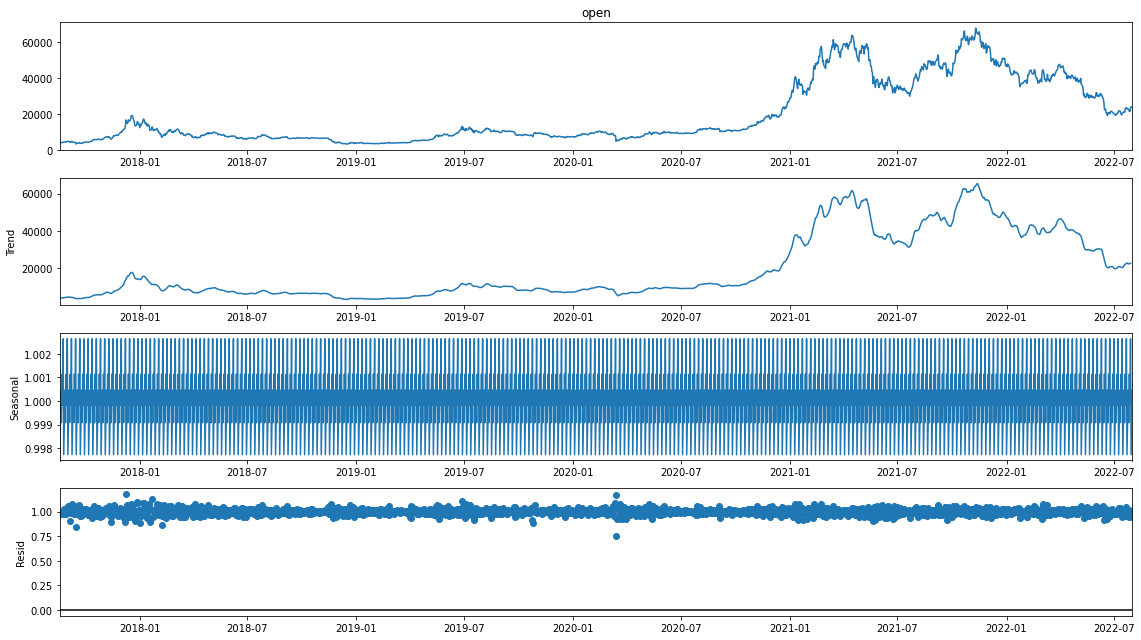

In [34]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['open'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Quote asset volume (QAV)

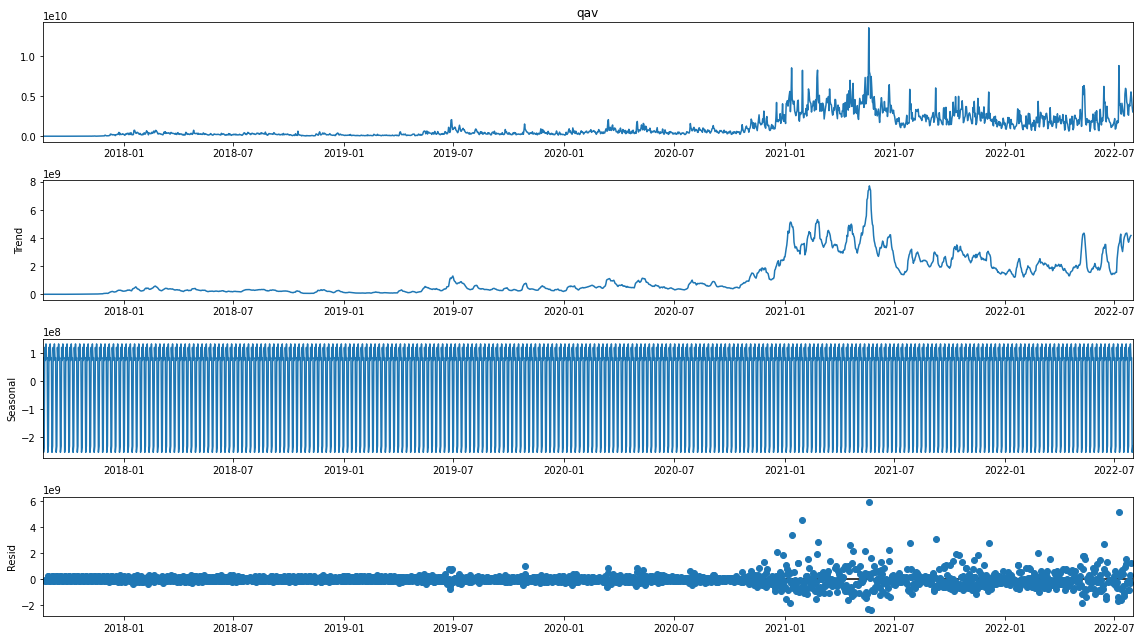

In [35]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['qav'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

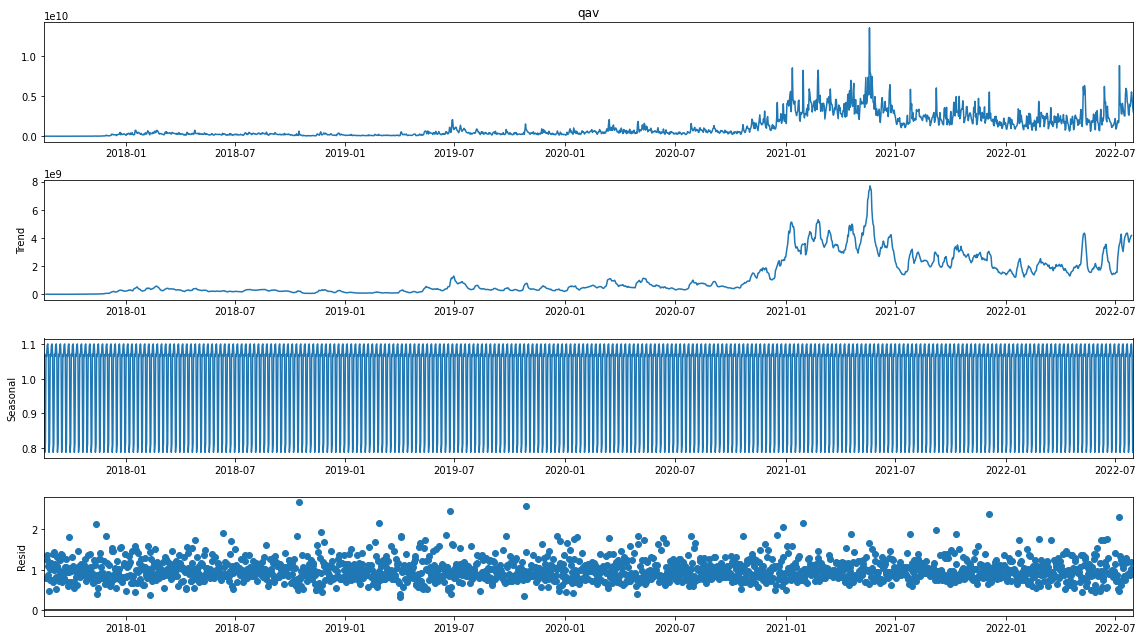

In [36]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['qav'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Número de trades (num_trades)

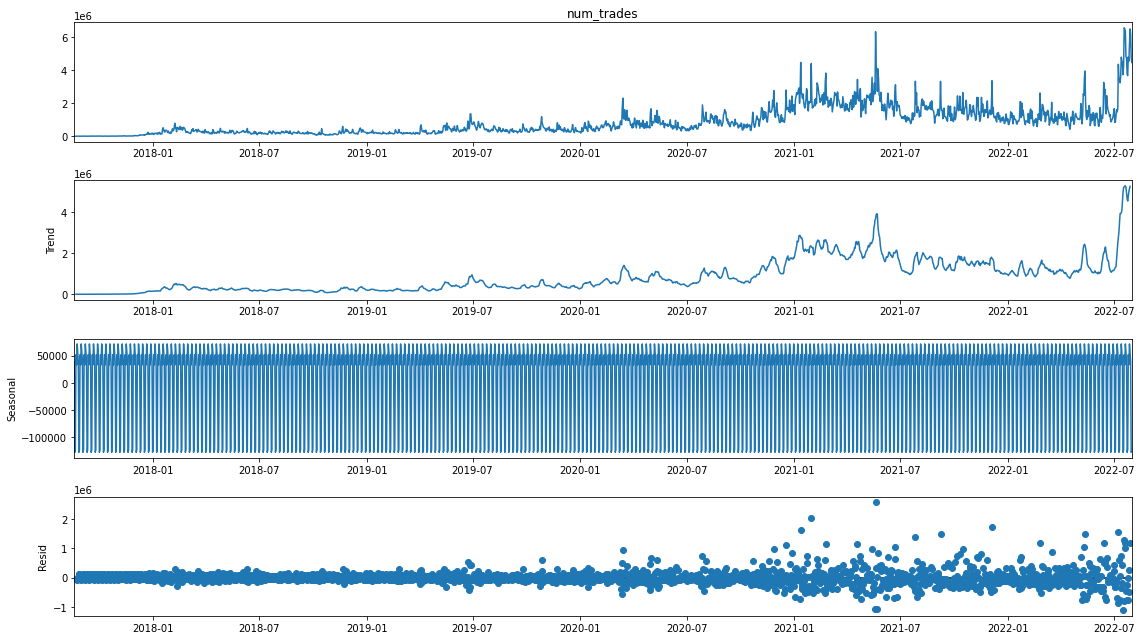

In [37]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['num_trades'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

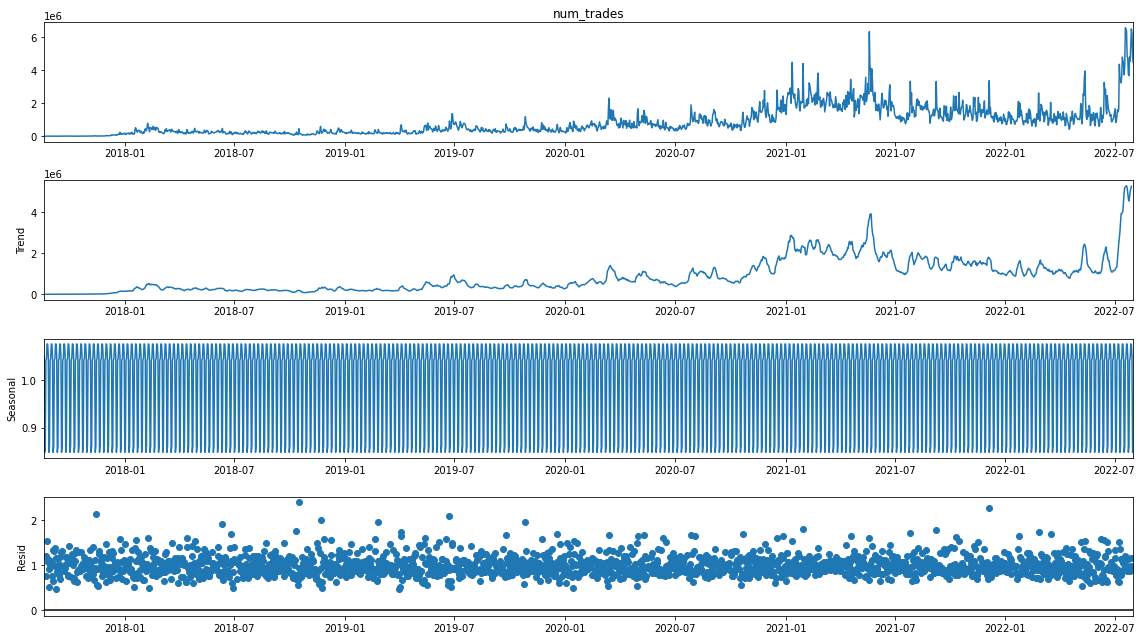

In [38]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['num_trades'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Taker buy base asset volume (taker_base_vol)

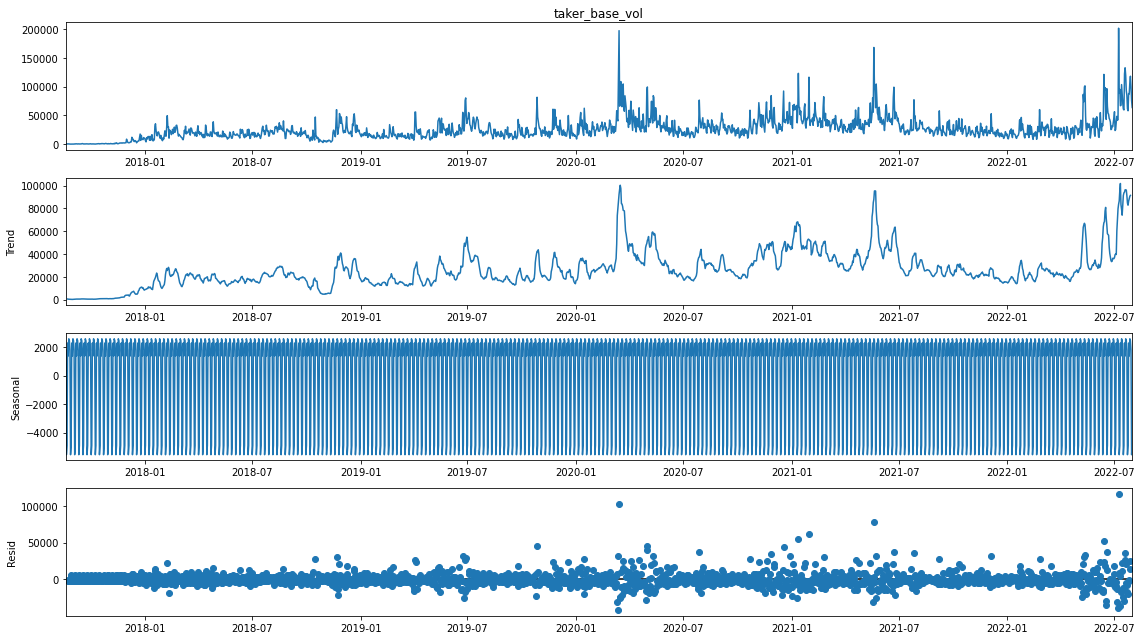

In [39]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_base_vol'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

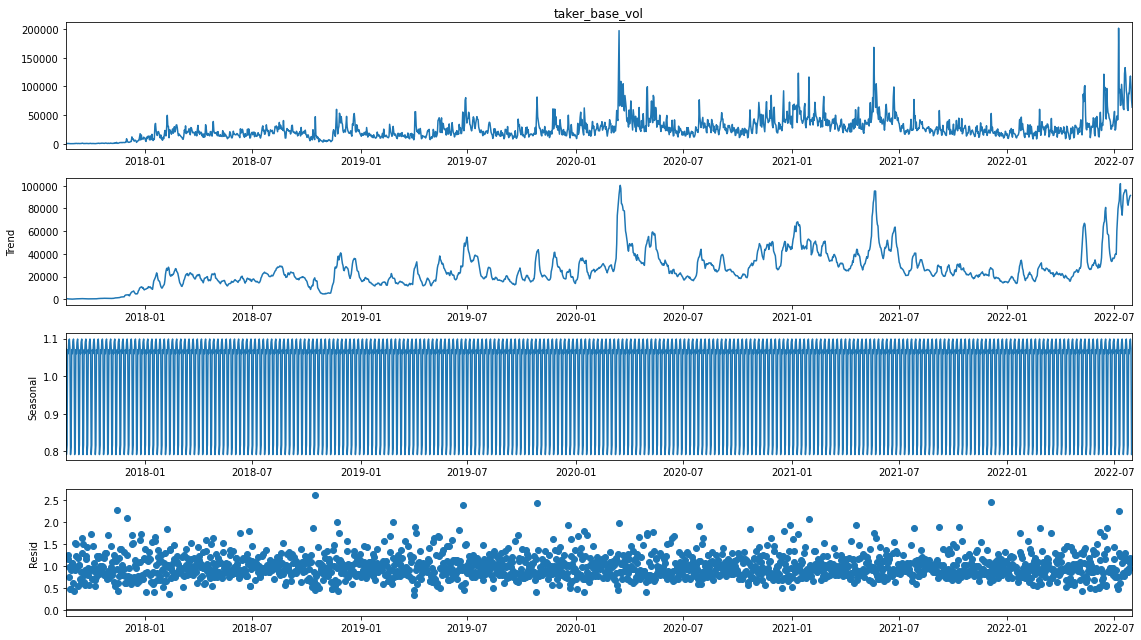

In [40]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_base_vol'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Taker buy quote asset volume (taker_quote_vol)

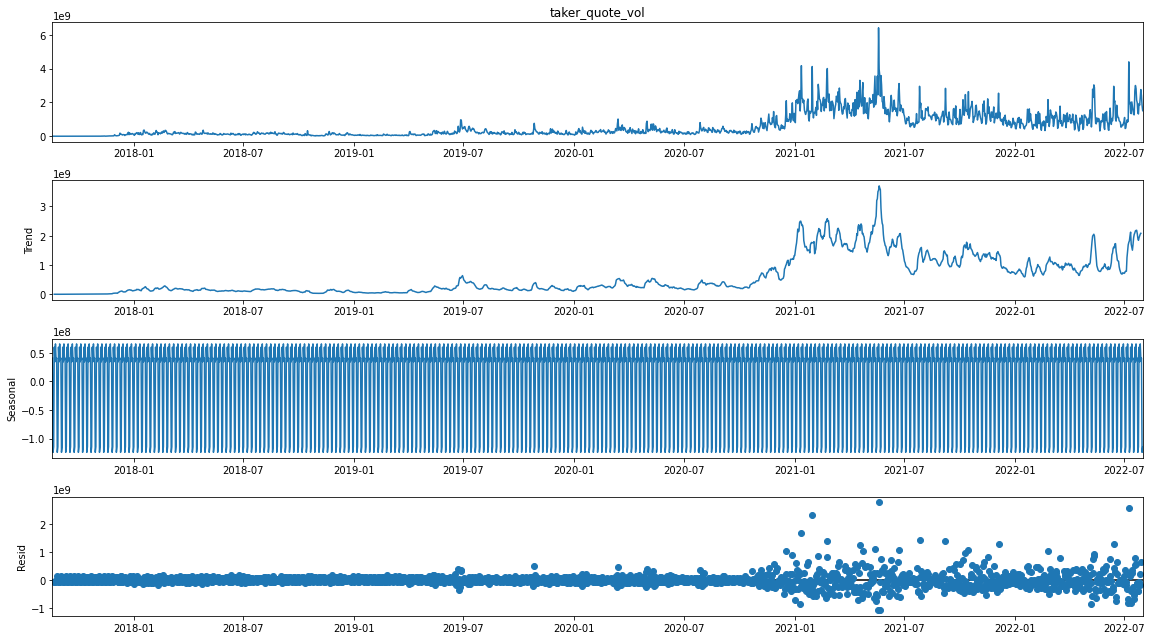

In [41]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_quote_vol'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

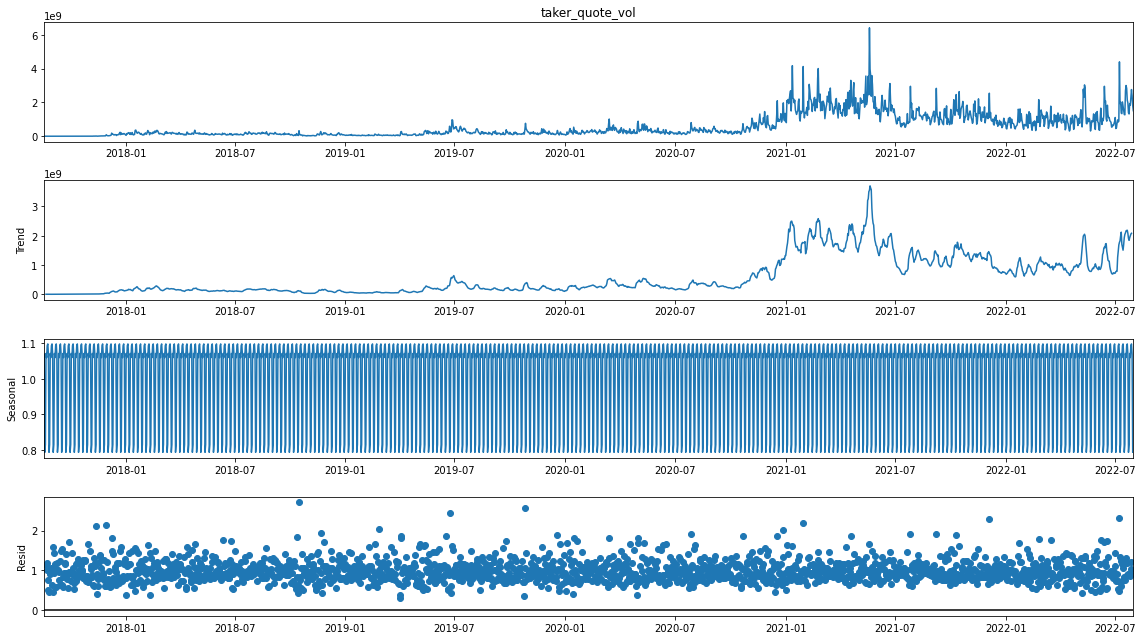

In [42]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_quote_vol'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()